In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
# Load data

data = pd.read_csv('data/hotel_bookings.csv')

### Data Preprocessing

In [3]:
# Replace nan in column agent and company with 0

data['agent'] = data['agent'].replace(np.nan,0)
data['company'] = data['company'].replace(np.nan,0)

# sum up children and babies in one column
data['children_all'] = data['children'] + data['babies']

# Drop rows where country and children is null
data.dropna(how='any', axis=0, inplace=True)

# replace negative and 0 adr with mean
mean_adr = data['adr'].mean().astype(int)
data['adr'] = data['adr'].apply(lambda x: mean_adr if x <= 0 else x)

# replace high adr >2000 with mean
mean_adr = data['adr'].mean().astype(int)
data['adr'] = data['adr'].apply(lambda x: mean_adr if x > 2000 else x)

# create date-time column
# data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str),format='%Y-%B-%d')

# Drop arrival_date_year, arrival_date_month, arrival_date_day_of_month
data.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'],axis=1, inplace=True)

# calculate duration of stay
data['duration_of_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# drop stays_in_weekend_nights and stays_in_week_nights
data.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1, inplace=True)

# drop reservation_status_date and reservation_status
data.drop(['reservation_status_date', 'reservation_status'],axis=1, inplace=True)

# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time
filter = (data.children == 0) & (data.adults == 0) & (data.babies == 0)
data = data[~filter]




In [4]:
pd.options.display.max_columns = None
data.head(-20)

,hotel,is_canceled,lead_time,arrival_date_week_number,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,children_all,duration_of_stay
0,Resort Hotel,0,342,27,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,102.00,0,0,0.0,0
1,Resort Hotel,0,737,27,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,102.00,0,0,0.0,0
2,Resort Hotel,0,7,27,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,0.0,1
3,Resort Hotel,0,13,27,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,0.0,1
4,Resort Hotel,0,14,27,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119365,City Hotel,0,54,35,1,0.0,0,BB,JPN,Direct,Direct,0,0,0,G,G,0,No Deposit,14.0,0.0,0,Transient,266.75,0,1,0.0,8
119366,City Hotel,0,210,35,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,7.0,0.0,0,Transient,85.59,0,1,0.0,7
119367,City Hotel,0,212,35,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,7.0,0.0,0,Transient,85.59,0,0,0.0,7
119368,City Hotel,0,261,35,2,0.0,0,BB,DEU,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,0.0,0,Transient,99.00,0,0,0.0,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118728 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118728 non-null  object 
 1   is_canceled                     118728 non-null  int64  
 2   lead_time                       118728 non-null  int64  
 3   arrival_date_week_number        118728 non-null  int64  
 4   adults                          118728 non-null  int64  
 5   children                        118728 non-null  float64
 6   babies                          118728 non-null  int64  
 7   meal                            118728 non-null  object 
 8   country                         118728 non-null  object 
 9   market_segment                  118728 non-null  object 
 10  distribution_channel            118728 non-null  object 
 11  is_repeated_guest               118728 non-null  int64  
 12  previous_cancellation

Transform categorical values into numerical values

In [6]:
# get categorical columns

cat_cols = [col for col in data.columns if data[col].dtype == 'object']

In [7]:
# printing unique values in categorical columns

for col in cat_cols:
    print(f" {col}\n{data[col].unique()}\n")

 hotel
['Resort Hotel' 'City Hotel']

 meal
['BB' 'FB' 'HB' 'SC' 'Undefined']

 country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP'
 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 

In [8]:
# Apply a label encoder for categorical values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])


## Define Features and Target

In [9]:
# Separate features and target

X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

In [10]:
X.head()

,hotel,lead_time,arrival_date_week_number,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,children_all,duration_of_stay
0,1,342,27,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0.0,0,2,102.0,0,0,0.0,0
1,1,737,27,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0.0,0,2,102.0,0,0,0.0,0
2,1,7,27,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0.0,0,2,75.0,0,0,0.0,1
3,1,13,27,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0.0,0,2,75.0,0,0,0.0,1
4,1,14,27,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0.0,0,2,98.0,0,1,0.0,2


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118728 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118728 non-null  int64  
 1   lead_time                       118728 non-null  int64  
 2   arrival_date_week_number        118728 non-null  int64  
 3   adults                          118728 non-null  int64  
 4   children                        118728 non-null  float64
 5   babies                          118728 non-null  int64  
 6   meal                            118728 non-null  int64  
 7   country                         118728 non-null  int64  
 8   market_segment                  118728 non-null  int64  
 9   distribution_channel            118728 non-null  int64  
 10  is_repeated_guest               118728 non-null  int64  
 11  previous_cancellations          118728 non-null  int64  
 12  previous_bookings_not

## Logistic Regression

In [13]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# train logistic regression model

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

/Users/aanken/Documents/Greenbootcamps_2024/GBC_Project_Hotel_Bookings/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Predict on test dataset

prediction_lr = model_lr.predict(X_test)

In [16]:
# evaluate model

from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix

acc_lr = accuracy_score(y_test, prediction_lr)
print(f"Accuracy score of logistic regression is {accuracy_score(y_test, prediction_lr)}")
print(classification_report(y_test, prediction_lr))

Accuracy score of logistic regression is 0.7671467475223898
              precision    recall  f1-score   support

           0       0.78      0.88      0.82     22300
           1       0.74      0.58      0.65     13319

    accuracy                           0.77     35619
   macro avg       0.76      0.73      0.74     35619
weighted avg       0.76      0.77      0.76     35619



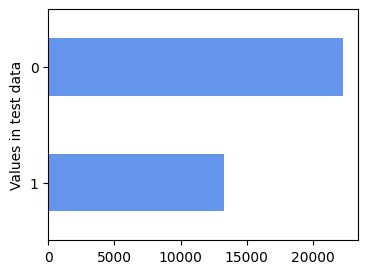

In [17]:
plt.figure(figsize=(4,3))
y_test.value_counts().plot(kind='barh', color='cornflowerblue')
plt.ylabel('Values in test data')
plt.xlabel('')
plt.gca().invert_yaxis()

Text(0.5, 25.722222222222214, 'Predicted Values')

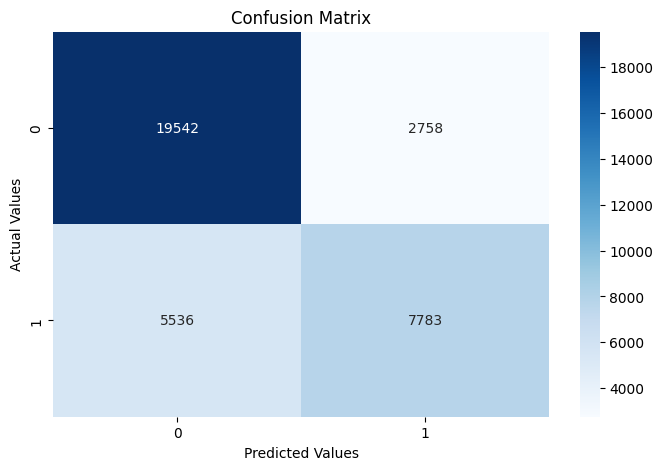

In [18]:
cm=confusion_matrix(y_test,prediction_lr)
plt.figure(figsize=(8,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [19]:
# Initialize dictionary to compare model

model_comparison = {'Logistic Regression': acc_lr}

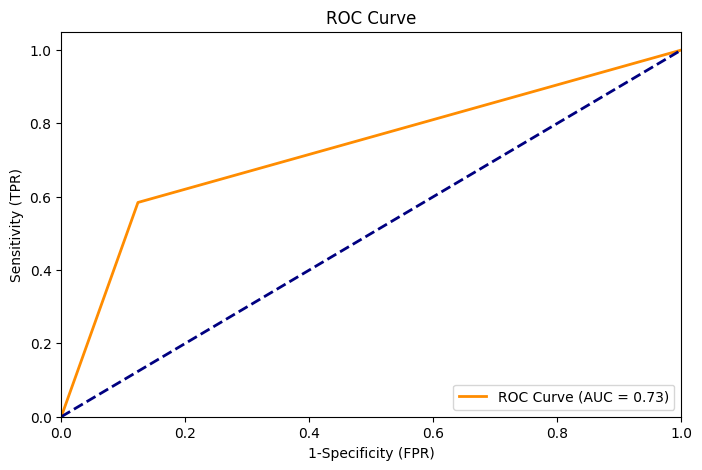

In [20]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, prediction_lr)
roc_auc = roc_auc_score(y_test, prediction_lr)

#Plotting the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

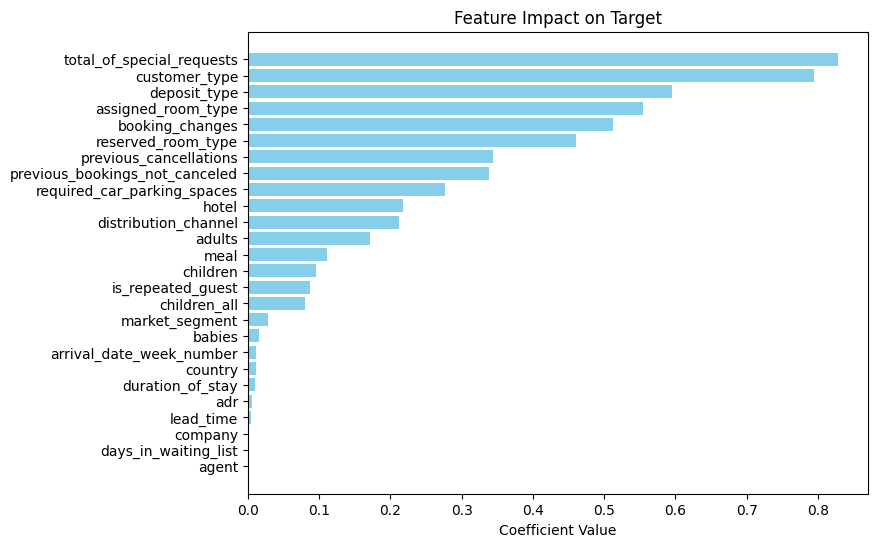

In [21]:
# Retrieve and interpret features

coeff_lr = model_lr.coef_[0]

# Map coefficients to feature names

features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeff_lr})

# Sort coefficient by absolute values
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(coef_df['Feature'], coef_df['Absolute_Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Target')
plt.gca().invert_yaxis()  # Highest impact on top
plt.show()

## Logistic Regression with Normalized Numerical Values

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Normalize features
X_scaled = scaler.fit_transform(X)


In [23]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# train model
model_lr_scaled = LogisticRegression()
model_lr_scaled.fit(X_train,y_train)

# predict on model
prediction_lr_scaled = model_lr_scaled.predict(X_test)

# evaluate model
acc_lr_scaled = accuracy_score(y_test, prediction_lr_scaled)
print(f"Accuracy score of logistic regression with normalized features is {accuracy_score(y_test, prediction_lr_scaled)}")
print(classification_report(y_test, prediction_lr_scaled))

# update comparison list
model_comparison['Logistic Regression Scaled']=acc_lr_scaled

Accuracy score of logistic regression with normalized features is 0.794042505404419
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     22300
           1       0.81      0.59      0.68     13319

    accuracy                           0.79     35619
   macro avg       0.80      0.75      0.76     35619
weighted avg       0.80      0.79      0.79     35619



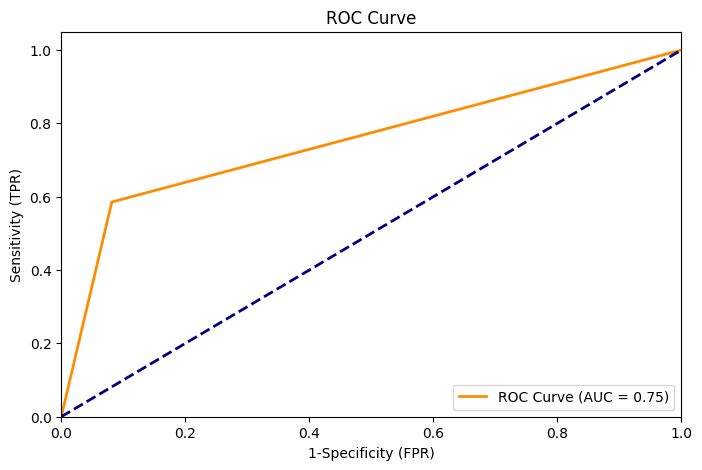

In [24]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, prediction_lr_scaled)
roc_auc = roc_auc_score(y_test, prediction_lr_scaled)

#Plotting the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 25.722222222222214, 'Predicted Values')

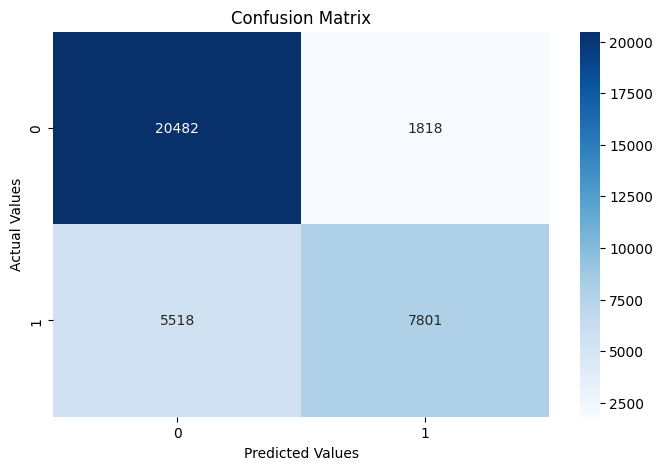

In [25]:
cm=confusion_matrix(y_test,prediction_lr_scaled)
plt.figure(figsize=(8,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

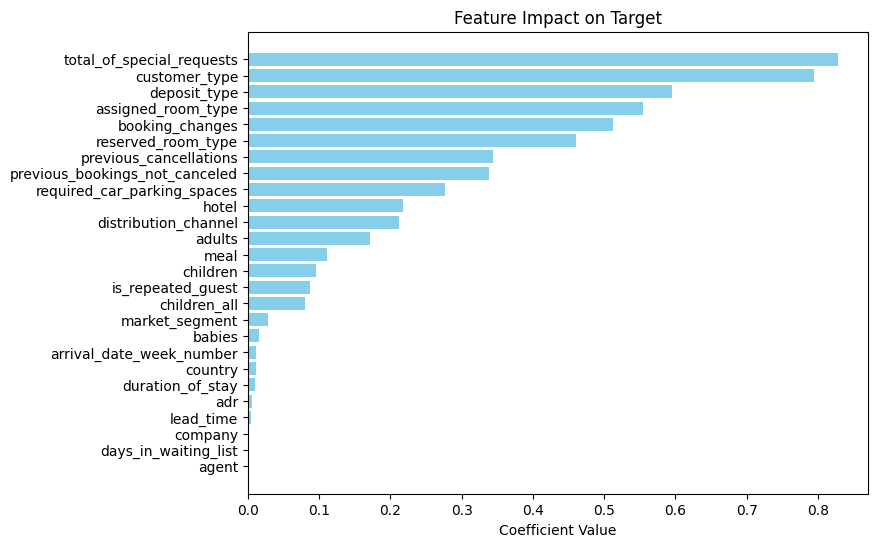

In [26]:
# Retrieve and interpret features

coeff_lr = model_lr.coef_[0]

# Map coefficients to feature names

features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeff_lr})

# Sort coefficient by absolute values
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(coef_df['Feature'], coef_df['Absolute_Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Target')
plt.gca().invert_yaxis()  # Highest impact on top
plt.show()

## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

prediction_knn = knn.predict(X_test)

# evaluate model
acc_knn = accuracy_score(y_test, prediction_knn)

print(f"Accuracy score of KNN is {accuracy_score(y_test, prediction_knn)}")
print(classification_report(y_test, prediction_knn))

# update comparison list
model_comparison['KNN']=acc_knn

Accuracy score of KNN is 0.8403941716499621
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     22300
           1       0.80      0.77      0.78     13319

    accuracy                           0.84     35619
   macro avg       0.83      0.83      0.83     35619
weighted avg       0.84      0.84      0.84     35619



### Choosing a K-value

In [28]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

optimal_k = error_rate.index(min(error_rate))+1

Text(0, 0.5, 'Error Rate')

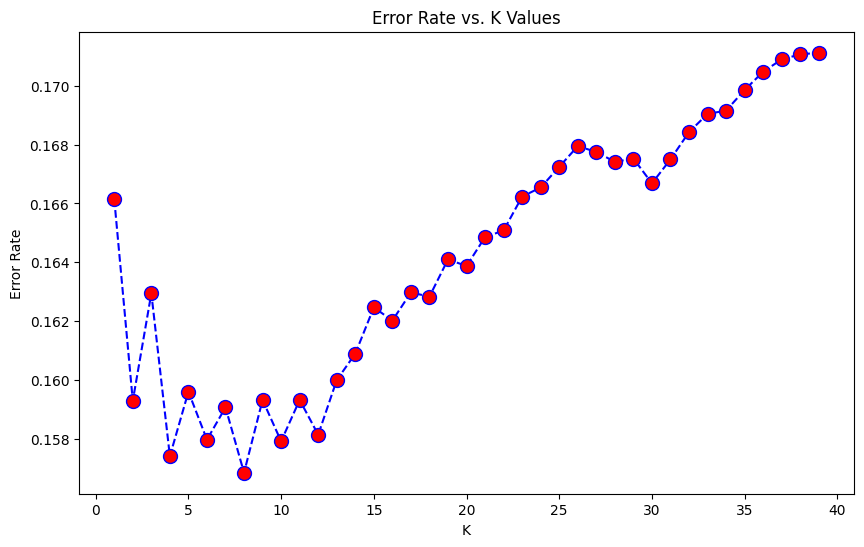

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')



In [30]:
# Re-train model with optimal k-value

knn = KNeighborsClassifier(n_neighbors=optimal_k)

knn.fit(X_train, y_train)

prediction_knn_2 = knn.predict(X_test)

# evaluate model
acc_knn_2 = accuracy_score(y_test, prediction_knn_2)

print(f"Accuracy score of KNN with 10 neighbors is {accuracy_score(y_test, prediction_knn_2)}")
print(classification_report(y_test, prediction_knn_2))

# update comparison list
model_comparison['KNN with optimal n_neighbors']=acc_knn_2

Accuracy score of KNN with 10 neighbors is 0.8431455122266206
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     22300
           1       0.84      0.72      0.77     13319

    accuracy                           0.84     35619
   macro avg       0.84      0.82      0.83     35619
weighted avg       0.84      0.84      0.84     35619



Text(0.5, 25.722222222222214, 'Predicted Values')

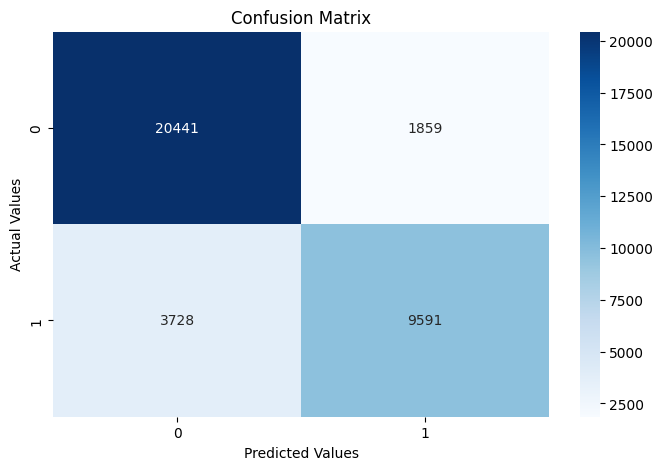

In [31]:
cm=confusion_matrix(y_test,prediction_knn_2)
plt.figure(figsize=(8,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

## Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

# Train model
dtree.fit(X_train,y_train)

# Predict
prediction_tree = dtree.predict(X_test)

# Evaluate the model

acc_tree = accuracy_score(y_test, prediction_tree)

print(f"Accuracy score of Decision Tree Classifier is {acc_tree}")
print(classification_report(y_test, prediction_tree))

# Describe the shape of the tree
print(f"Depth of tree is {dtree.get_depth()}")
print(f"Number of leaves of tree is {dtree.get_n_leaves()}")

# update comparison list
model_comparison['Decision Tree Classifier']=acc_tree

Accuracy score of Decision Tree Classifier is 0.8498273393413628
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     22300
           1       0.80      0.81      0.80     13319

    accuracy                           0.85     35619
   macro avg       0.84      0.84      0.84     35619
weighted avg       0.85      0.85      0.85     35619

Depth of tree is 46
Number of leaves of tree is 9969


### Find optimal depth of tree

The Optimal depth of decision tree is 20


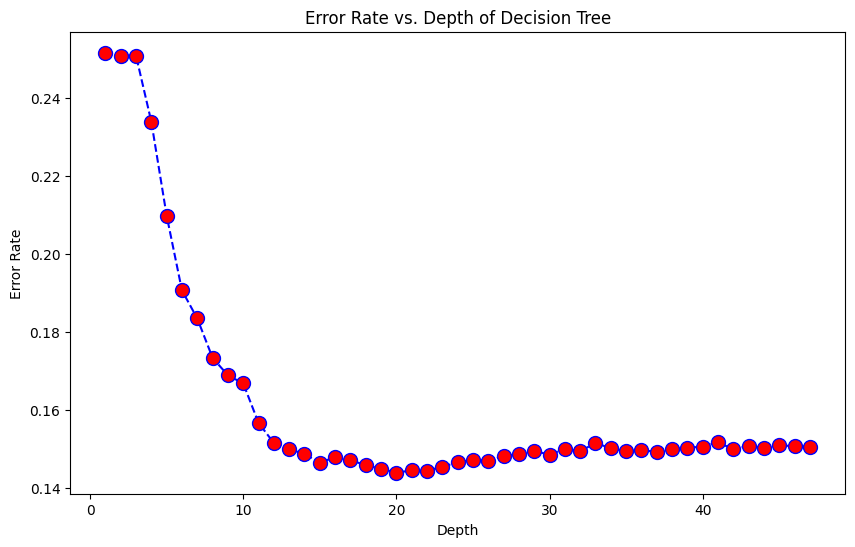

In [33]:
error_rate_tree = []

for i in range(1,48):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    pred_i = dtree.predict(X_test)
    error_rate_tree.append(np.mean(pred_i != y_test))

# plot resulting error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,48),error_rate_tree,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Depth of Decision Tree')
plt.xlabel('Depth')
plt.ylabel('Error Rate')

# Evaluate optimal decision tree depth
optimal_depth = error_rate_tree.index(min(error_rate_tree))+1
print(f"The Optimal depth of decision tree is {optimal_depth}")

### Re-train with optimal depth

In [34]:
dtree_2 = DecisionTreeClassifier(max_depth=optimal_depth)

# Train model
dtree_2.fit(X_train,y_train)

# Predict
prediction_tree_2 = dtree_2.predict(X_test)

# Evaluate the model

acc_tree_2 = accuracy_score(y_test, prediction_tree_2)

# update comparison list
model_comparison['Decision Tree Classifier with optimal depth']=acc_tree_2

Text(0.5, 25.722222222222214, 'Predicted Values')

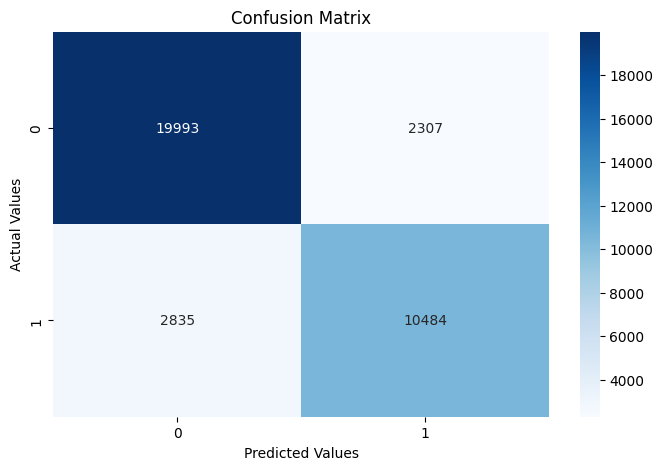

In [35]:
cm=confusion_matrix(y_test,prediction_tree_2)
plt.figure(figsize=(8,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) # number of trees = 100
rfc.fit(X_train, y_train)

# Prediction
prediction_rfc = rfc.predict(X_test)

# Evaluate the model

acc_rfc = accuracy_score(y_test, prediction_rfc)

print(f"Accuracy score of Random Forest Classifier is {acc_rfc}")
print(classification_report(y_test, prediction_rfc))

# update comparison list
model_comparison['Random Forest Classifier']=acc_rfc

Accuracy score of Random Forest Classifier is 0.8894971784721637
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     22300
           1       0.88      0.82      0.85     13319

    accuracy                           0.89     35619
   macro avg       0.89      0.87      0.88     35619
weighted avg       0.89      0.89      0.89     35619



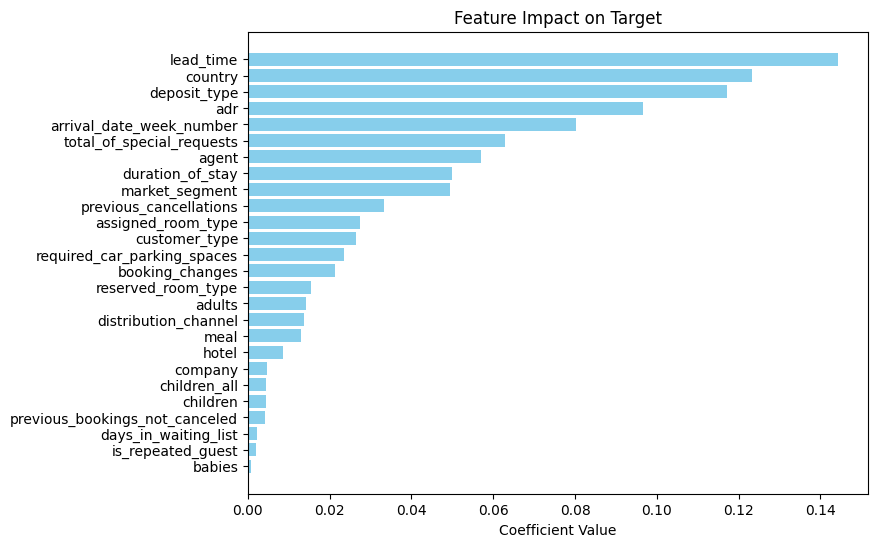

In [37]:
# Retrieve and interpret features

coeff_rfc = rfc.feature_importances_

# Map coefficients to feature names

features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeff_rfc})

# Sort coefficient by absolute values
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(coef_df['Feature'], coef_df['Absolute_Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Target')
plt.gca().invert_yaxis()  # Highest impact on top
plt.show()

Text(0.5, 25.722222222222214, 'Predicted Values')

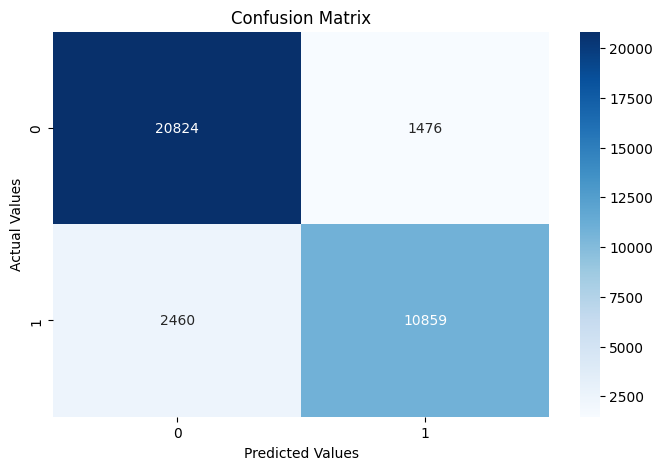

In [38]:
cm=confusion_matrix(y_test,prediction_rfc)
plt.figure(figsize=(8,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

## AdaBoost

In [39]:
from sklearn.ensemble import AdaBoostClassifier
adac =  AdaBoostClassifier(n_estimators=100) # number of trees = 100
adac.fit(X_train, y_train)

# Prediction
prediction_adac = adac.predict(X_test)

# Evaluate the model

acc_adac = accuracy_score(y_test, prediction_adac)

print(f"Accuracy score of AdaBoost Classifier is {acc_adac}")
print(classification_report(y_test, prediction_adac))

# update comparison list
model_comparison['AdaBoost Classifier']=acc_adac

/Users/aanken/Documents/Greenbootcamps_2024/GBC_Project_Hotel_Bookings/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy score of AdaBoost Classifier is 0.8329823970352902
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     22300
           1       0.83      0.70      0.76     13319

    accuracy                           0.83     35619
   macro avg       0.83      0.81      0.82     35619
weighted avg       0.83      0.83      0.83     35619



## Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =  GradientBoostingClassifier(n_estimators=100) # number of trees = 100
gbc.fit(X_train, y_train)

# Prediction
prediction_gbc = gbc.predict(X_test)

# Evaluate the model

acc_gbc = accuracy_score(y_test, prediction_gbc)

print(f"Accuracy score of Gradient Boost Classifier is {acc_gbc}")
print(classification_report(y_test, prediction_gbc))

# update comparison list
model_comparison['Gradient Boost Classifier']=acc_gbc

Accuracy score of Gradient Boost Classifier is 0.8454195794379404
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     22300
           1       0.83      0.73      0.78     13319

    accuracy                           0.85     35619
   macro avg       0.84      0.82      0.83     35619
weighted avg       0.84      0.85      0.84     35619



## XG Boost

In [41]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators = 100)

# Train model
xgbc.fit(X_train, y_train)

# Prediction
prediction_xgbc = xgbc.predict(X_test)

# Evaluate the model

acc_xgbc = accuracy_score(y_test, prediction_xgbc)

print(f"Accuracy score of Gradient Boost Classifier is {acc_xgbc}")
print(classification_report(y_test, prediction_xgbc))

# update comparison list
model_comparison['XG Boost Classifier']=acc_xgbc

Accuracy score of Gradient Boost Classifier is 0.877649569050226
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     22300
           1       0.86      0.81      0.83     13319

    accuracy                           0.88     35619
   macro avg       0.87      0.86      0.87     35619
weighted avg       0.88      0.88      0.88     35619



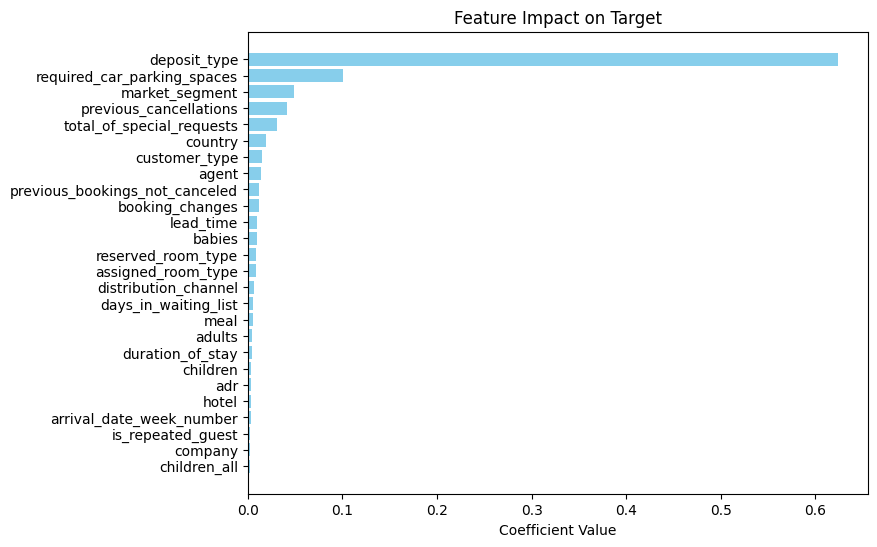

In [42]:
# Retrieve and interpret features

coeff_xgbc = xgbc.feature_importances_

# Map coefficients to feature names

features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeff_xgbc})

# Sort coefficient by absolute values
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(coef_df['Feature'], coef_df['Absolute_Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Target')
plt.gca().invert_yaxis()  # Highest impact on top
plt.show()

## Support Vector Machine

In [43]:
from sklearn.svm import SVC

model_svc = SVC()

# Train model
model_svc.fit(X_train, y_train)

# Predict
prediction_svc = model_svc.predict(X_test)

# Evaluate the model

acc_svc = accuracy_score(y_test, prediction_svc)

print(f"Accuracy score of Support Vector Machine is {acc_svc}")
print(classification_report(y_test, prediction_svc))

# update comparison list
model_comparison['SVM']=acc_svc

Accuracy score of Support Vector Machine is 0.8393554002077543
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     22300
           1       0.84      0.70      0.77     13319

    accuracy                           0.84     35619
   macro avg       0.84      0.81      0.82     35619
weighted avg       0.84      0.84      0.84     35619



In [44]:

# update comparison list
model_comparison['ANN']=0.9144978523254395

## Comparison of the models

/var/folders/k4/15639thj2wv04zjsd9344mlm0000gn/T/ipykernel_25673/3326384383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model', x = 'Accuracy Score', data = model_df, palette= 'plasma')


(0.6, 1.0)

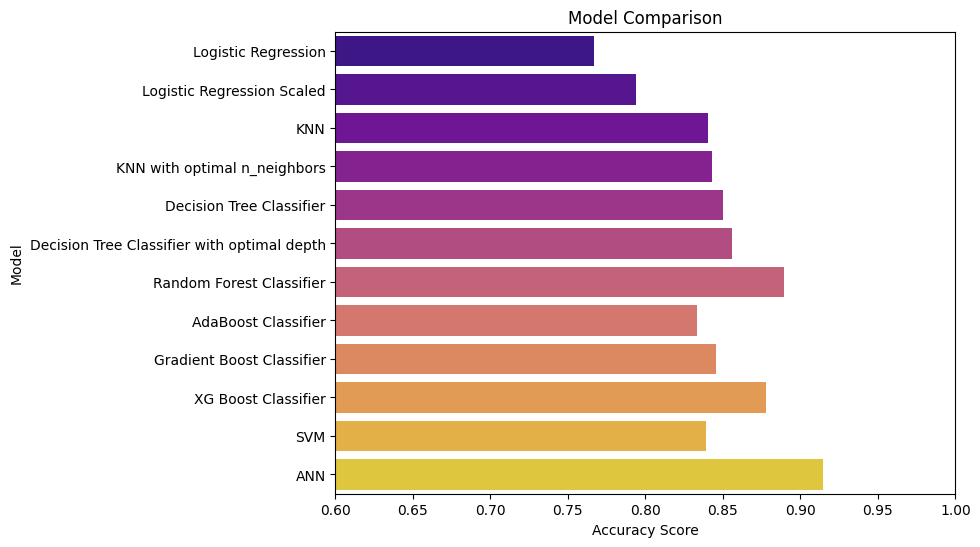

In [45]:
# plot accuracy scores of the different models
model_df = pd.DataFrame(list(model_comparison.items()), columns=['Model', 'Accuracy Score'])
plt.figure(figsize=(8,6))
sns.barplot(y='Model', x = 'Accuracy Score', data = model_df, palette= 'plasma')
plt.title('Model Comparison')
plt.xlim(0.6,1)